In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Room_Occupancy_Dataset/file.csv')

In [ ]:
data

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2660,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [ ]:
data.head()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
data.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2660,24.290000,25.700000,808.0,1150.25,0.004829,1
2661,24.330000,25.736000,809.8,1129.20,0.004848,1
2662,24.330000,25.700000,817.0,1125.80,0.004841,1
2663,24.356667,25.700000,813.0,1123.00,0.004849,1
2664,24.408333,25.681667,798.0,1124.00,0.004860,1


In [ ]:
data.shape

(2665, 6)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB


In [ ]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [ ]:
data.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [ ]:
data.describe().columns


Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [ ]:
data['Occupied'] = data['Occupancy'].replace({0: 'No', 1: 'Yes'})

In [ ]:
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Occupied
0,23.7000,26.272,585.200000,749.200000,0.004764,1,Yes
1,23.7180,26.290,578.400000,760.400000,0.004773,1,Yes
2,23.7300,26.230,572.666667,769.666667,0.004765,1,Yes
3,23.7225,26.125,493.750000,774.750000,0.004744,1,Yes
4,23.7540,26.200,488.600000,779.000000,0.004767,1,Yes


In [ ]:
data['Occupied'].value_counts()

No     1693
Yes     972
Name: Occupied, dtype: int64

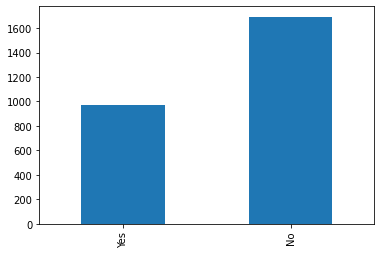

In [ ]:
data.Occupied.value_counts().sort_index(ascending=False).plot(kind='bar')

In [ ]:
features=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
data.groupby('Occupied')[features].mean()

,Temperature,Humidity,Light,CO2,HumidityRatio
Occupied,,,,,
No,20.884211,24.226417,17.332543,547.613497,0.003703
Yes,22.391266,27.317816,499.596132,1014.517585,0.004591


In [ ]:
data_features = data[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupied']]

               Temperature  Humidity     Light       CO2  HumidityRatio
Temperature       1.000000  0.716988  0.768428  0.870226       0.894548
Humidity          0.716988  1.000000  0.561905  0.911611       0.951914
Light             0.768428  0.561905  1.000000  0.769167       0.693286
CO2               0.870226  0.911611  0.769167  1.000000       0.964440
HumidityRatio     0.894548  0.951914  0.693286  0.964440       1.000000


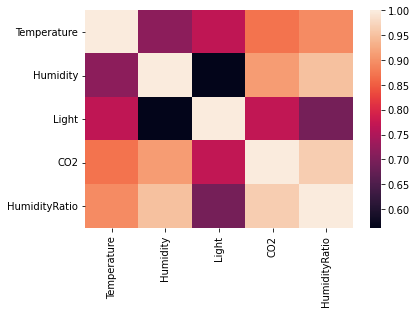

In [ ]:
print(data_features.corr())
sns.heatmap(data_features.corr())

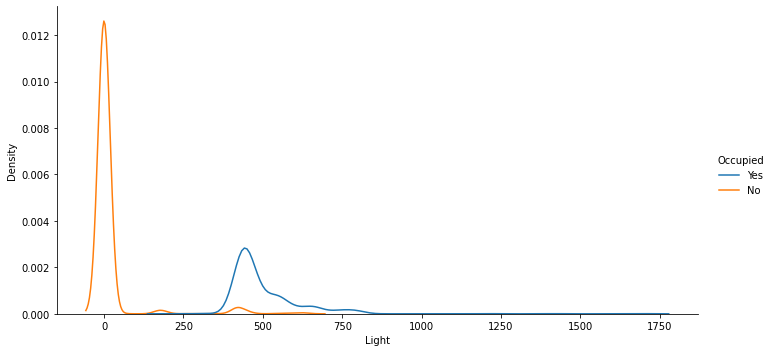

In [ ]:
sns.displot(kind='kde', x='Light', hue='Occupied', data=data, aspect=2);

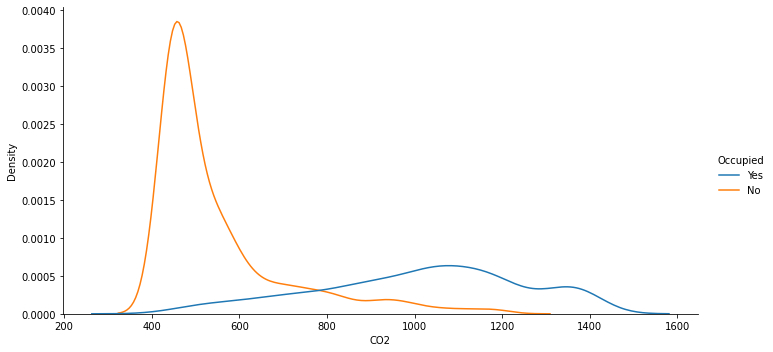

In [ ]:
sns.displot(kind='kde', x='CO2', hue='Occupied', data=data, aspect=2);

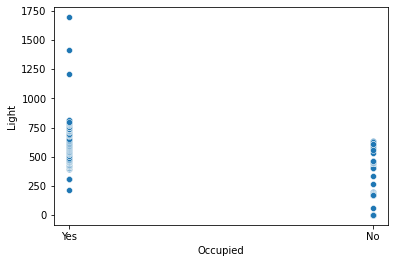

In [ ]:
sns.scatterplot(y="Light",x="Occupied",data=data)

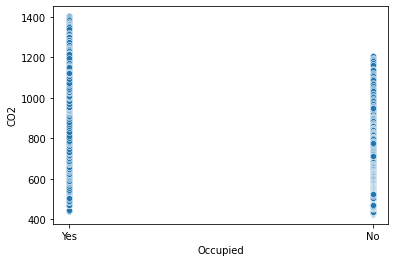

In [ ]:
sns.scatterplot(y="CO2",x="Occupied",data=data)

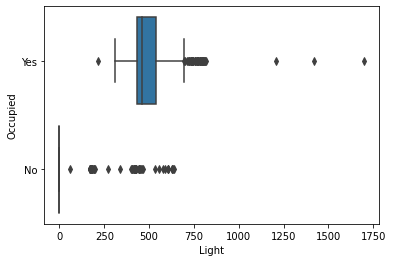

In [ ]:
sns.boxplot(x='Light', y='Occupied', data=data);


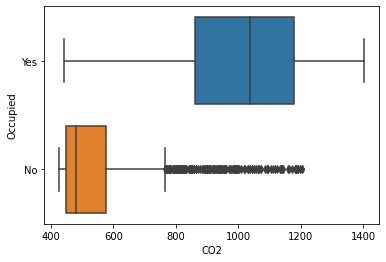

In [ ]:
sns.boxplot(x='CO2', y='Occupied', data=data);

In [ ]:
x = data.drop([ 'Occupancy', 'Occupied'], axis = 1)

In [ ]:
y = data.Occupancy

In [ ]:
x.shape

(2665, 5)

In [ ]:
y.shape


(2665,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9831144465290806


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("Training Accuracy :", classifier.score(X_train, y_train))
print("Testing Accuracy :", classifier.score(X_test, y_test))

Training Accuracy : 0.99906191369606
Testing Accuracy : 0.9887429643527205


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [ ]:
model1= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model1.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
print("Training Accuracy :", model1.score(X_train, y_train))
print("Testing Accuracy :", model1.score(X_test, y_test))


Training Accuracy : 0.9878048780487805
Testing Accuracy : 0.9962476547842402


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
model2 = GaussianNB()
model2.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
print("Training Accuracy :", model2.score(X_train, y_train))
print("Testing Accuracy :", model2.score(X_test, y_test))

Training Accuracy : 0.9648217636022514
Testing Accuracy : 0.9568480300187617
